# Deep Learning in Python
- William Surles
- 2017-12-22
- Datacamp class
- https://www.datacamp.com/courses/deep-learning-in-python

## Whats Covered

**Basics of deep learning and neural networks**
- Introduction to deep learning
- Forward propagation
- Activation functions
- Deeper networks

**Otimizing a neural network with backward propagation**
- The need for optimization
- Gradient descent
- Backpropagation
- Backpropagation in practice

**Building deep learning models with keras**
- Creating a keras model
- Compiling and fitting a model
- Classification models
- Using models

**Fine-tuning keras models**
- Understanding model optimization
- Model validation
- Thinking about model capacity
- Stepping up to images
- Final thoughts

## Additional Resources

- Check this [wiki page](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research) on data sets for machine learning research

## Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basics of deep learning and neural networks

## Introduction to deep learning

#### Interactions
- Imagine you work for a bank and you need to predict the number of transactions each customer will make next year
- I linear regression model could give you an answer based on weighting certain factors, like age or number of kids. But it does not do a great job of capturing the intricate interactions of the real world process.
- Neural networks account for interactions really well
- Deep learning uses especially powerfyl neural networks
 - This works well for the intricacies in many types of data like...
 - Text, images, video, audio, source code, etc
 
#### Course structure
- First to chapters focus on conceptual knowledge
 - debug and tune deep learing models on conventional prediction problems
 - Lay the foundation for progressin towards modern applications
- Chp 3 and 4 covers keras
 - Build and tune models in keras

## Forward propagation

- There are good pictures in the slides. I'll just explain it
- Each link between nodes is given a weighting
- the inputs times the weights added together equals the value at the next node
 - this is essentially a dot product of inputs and weights (yay matrix math)
- keep doing this until you get the output value at the end. 
- This happens for one data point (or row, or observation) at a time. The output is the prediction for the data point
 - The trick is to get all the weightings correct so the model is accurate.

### Coding the forward propagation algorithm

![](images/1_hidden_layer.png)

In [2]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [3]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-39


- Well, that was easy. : ) 
- -39 seems like a wierd value but I'm sure will fix that later
- This is just for one observation with two variables
- And there is just one layer with 2 nodes.
- About as simple as you can get. 
- But this is about as complex as most regression models I guess.

## Activation functions

- Activation functions are applied at the node
- The modify the node input value to something different for the node output
- This is used to capture non-linearity in the the model
- They have been shown to greatly increase the perofrmance of a neural network
- For a long time `tanh()` was used as the standard activation function
- Now ReLU (Rectified Linear Activation) is the standard
 - A ReLu function is basically just `max(0, input)`
 - Its prevents negative numbers at the node

### The Rectified Linear Activation Function

In [4]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


### Applying the network to many observations/rows of data

In [5]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {
    'node_0': np.array([2, 4]), 
    'node_1': np.array([ 4, -5]), 
    'output': np.array([2, 7])}

In [6]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


## Deeper networks

- Deeper networks just have more layers
- 5- 10 maybe
- At pone point 15 was the cutting edge
- Now you could see 1000 hidden layers
- Its just about proccessing power
 - These work well with parallel processing so you can scale out for the large networks
- The more layers the more complex the features get
 - At first the model may find things like lines, then shapes, maybe even an eye
 - Then it may recognize a face 
 - Then different faces like human or cat, or differnt people. 
 - I'm sure this is how google and face book do face recognition

### Multi-layer neural networks
![](images/2_hidden_layers.png)

In [7]:
input_data = np.array([3, 5])
weights = {
    'node_0_0': np.array([2, 4]),
    'node_0_1': np.array([ 4, -5]),
    'node_1_0': np.array([-1,  2]),
    'node_1_1': np.array([1, 2]),
    'output': np.array([2, 7])}

In [8]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


### Representations are learned

How are the weights that deterimine the features/interaction in Neural Networks created>
 - The model training process sets them to optimize predictive accuracy

# Otimizing a neural network with backward propagation

## The need for optimization

- The weights are how you optimize the neural network. 
- Change the weights until the output is correct

#### Predictions with multiple points
- Making acurate predictions gets harder with more points
- At any set of weights, there are many values of the error
- ... corresponding to the many points we make predictions for

#### Loss funciton
- Aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Could be mean squarred error
- Lower loss function value means a better model
- Goal: Find the weights thta five the lowest value for the loss function
- Gradient descent is how you find the lowest value

#### Gradient descent
- Imaginge you are in a pitch dark field
- you want to find the lowest point
- Feel the ground to see how it slopes
- Take a small step downhill
- Repeat until it is uphill in every direction

#### Gradient descent steps
- Start at random point
- Until yo are somewhere flat:
 - Find the slope
 - Take a step downhill

### Coding how weight changes affect accuracy

In [9]:
def predict_with_network(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 in the first hidden layer
    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output: model_output
    model_output = (hidden_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)


In [10]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


### Scaling up to multiple data points

In [11]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': [2, 1], 
             'node_1': [1, 2], 
             'output': [1, 1]}

weights_1 = {'node_0': [2, 1],
             'node_1': [ 1. ,  1.5],
             'output': [ 1. ,  1.5]}

In [12]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

print(model_output_0)
print(model_output_1)

print('target actuals:')
print(target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


[9, 9, 0, 12]
[9.75, 10.0, 0.0, 14.0]
target actuals:
[1, 3, 5, 7]
Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient descent

- If the slope is positive:
 - Going opposite the slope means moving to lower numbers
 - Subtract the slope from the current value
 - Too big a step might lead us astray
- Solution: learning rate
 - Update each weight by subtracting learning rate * slope
 - Learning rates are frequently around 0.01

#### Slope calculation example
- to calculate the slope for a weight, need to multiply 3 things:
 - slope of the loss function wrt value at the node we feed into
 - the valye of the node that feeds into our weight
 - slope of the activation functino wrt value we feed into
- example
 - node = 3, weight = 2, output = 4, actual target value = 10
- lets step through those 3 things:
- slope of mean-squarred loss funciton wrt prediciton:
 - 2 * (Predictied Value = Actual Value) = 2 * Error = 2 * -4
- the vale of the node that feeds into our weight
 - 2 * -4 * 3 = -24
- slope of the activation functino wrt value we feed into
 - We don't have an activation function so ignore that here
- if learning rate is 0.01 the new wieght would be 
 - 2 - 0.01(-24) = 2.24
 - this will give us better model and will continue to get better as we repeat this process
 - We would repeat this process separately for each weight, then update them simultaneously with the respective deriviative
 

### Calculating slopes

- When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. 
- Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). 
- In this case, the output will also be a vector, which is exactly what you want.
- In our example we have 3 input nodes and one prediciton node as the target

In [13]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [14]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()
print("pred:", preds)
print("target:", target)

# Calculate the error: error
error =  preds - target

# Calculate the slope: slope
slope = 2 * error * input_data

# Print the slope
print(slope)


pred: 7
target: 0
[14 28 42]


### Improving model weights

In [15]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Update the weights: weights_updated
weights_updated = weights - (slope * learning_rate)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Making multiple updates to weights
- Lets clean up this process so we can do this multiple times easily
- We are wrapping the error and slope calculations in functions

In [16]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)
    
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

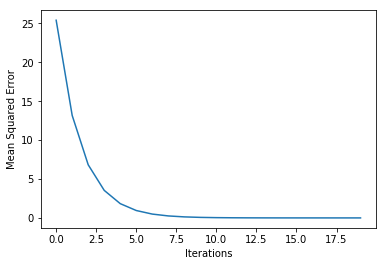

In [17]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - slope * 0.01
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation

- Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
- Comes from chain rule of calculus
- Important to understand the process, but you will generally use a library that implements this

#### Backpropagation process
- Trying to estimate the slope of the loss function wrt each weight
- Do forward propagation to calculate predictions and errors first, before we do backpropagation
- Go back one layer at a time
- Gradients for weight is product of:
  - Node value feeding into that weight
    - We know this from the calculation when doing forward propagation
  - Slope of loss function wrt node it feeds into
    - We just calculated this in the back propagation process. 
  - Slope of activation function at the node it feeds into
    - For the ReLU activation function this is 0 if the value is negative and 1 if its positive
- We need to also keep track of the slopes of the loss funciton wrt node values
  - Slope of node values are just the sum of the slopes for all weights that come out of them

### The relationship between forward and backward propagation

- its 1 to 1
- Each time you generate predictions using forward propagation, you updated the weights using backward propagation.

### Thinking about backward propagation

- If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. 
- In that circumstance, the updates to all weights in the newtwork would also be 0.

## Backpropagation in practice

- See a simple example of backpropagtion in the slides

#### Calculating slopes associated with any weight
- Gradients for weight is product of:
  - Node value feeding into that weight
  - Slope of activation function for the node being fed into 
    - This is simple the sum of slopes of weights coming out of node
  - Slope of loss function wrt output node
    - For relu this is 0 if negative and 1 if positive value at node

#### Backpropagation: Recap
- Start at some random set of weights
- Use forward propagation to make a prediction
- Use backward propagation to calculate the slope of the loss function wrt each weight
- Multiply that slope by the learning rate, and subtract from the current weights
- Keep going with that cycle until we get to a flat part

#### Stochastic gradient descent
- It is common to calclate slopes on only a subset of the data ('batch')
- Use a different batch of data to calculate the next update
- Start over from the beginning once all data is used
- Each time through the training data is called an epoch
- When slopes are calculated on one batch at a time its called stochastic gradient descent
- Note: I guess this is a way to prevent over fitting to a specific 'batch' of training data. Or it could just be used to speed things up.

# Building deep learning models with keras

## Creating a keras model

#### Model building steps
- Specify Architecture
- Compile
- Fit
- Predict

#### keras notes
- you need to specify the number of inputs to the first layer. This is the number of features or columns in the data
- We will focus on sequential. This means layers connect only to the next layer. Like what we have practiced in this clas. There are more complex layer formats but this will work for now. 
- In a dense layer all of the nodes in the previous layer connect to all the nodes in the current layer.
- Here we use the 'relu' activation function. Keras supports pretty much all activtion functions we would want to use in practice.

### Specifying a model

In [18]:
file = 'https://assets.datacamp.com/production/course_1975/datasets/hourly_wages.csv'
wages = pd.read_csv(file)
wages.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [19]:
target = wages['wage_per_hour'].values
print(target.shape)
target[0:6]


(534,)


array([  5.1 ,   4.95,   6.67,   4.  ,   7.5 ,  13.07])

In [20]:
predictors = wages.drop('wage_per_hour', axis = 1).values
print(predictors.shape)
predictors

(534, 9)


array([[ 0,  8, 21, ...,  0,  1,  0],
       [ 0,  9, 42, ...,  0,  1,  0],
       [ 0, 12,  1, ...,  0,  1,  0],
       ..., 
       [ 1, 17, 25, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  1,  0,  0],
       [ 0, 16, 33, ...,  0,  1,  0]])

In [21]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation = 'relu', input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1))


Using TensorFlow backend.


## Compiling and fitting a model

#### Compile your model
- Specify the optimizer
  - Controls the learning rate
  - Many options and mathematically complex
    - Even the experts don't know all the details and options
  - "Adam" is ususally a good robust choice
- Loss function
  - "mean_squarred_error" is common for regression problems
  - we will use something else later for classificaiton problems
 
#### Fitting a model
- Applying backpropation and gradient descent with your data to update the weights
- This will be similar to what we did in scikitlearn but with more options
- Scaling data before fitting can ease optimization

### Compiling the model

- [documention](https://keras.io/optimizers/#adam) on "adam" model and others
- [original paper](https://arxiv.org/abs/1412.6980v8) on adam model

In [22]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fitting the model

In [23]:
# Fit the model
model.fit(predictors, target)

Epoch 1/10
534/534 [==============================] - 0s - loss: 23.9523     
Epoch 2/10
534/534 [==============================] - 0s - loss: 22.2524     
Epoch 3/10
534/534 [==============================] - 0s - loss: 23.1267     
Epoch 4/10
534/534 [==============================] - 0s - loss: 22.4713     
Epoch 5/10
534/534 [==============================] - 0s - loss: 21.8556     
Epoch 6/10
534/534 [==============================] - 0s - loss: 21.5578     
Epoch 7/10
534/534 [==============================] - 0s - loss: 20.8700     
Epoch 8/10
534/534 [==============================] - 0s - loss: 21.9230     
Epoch 9/10
534/534 [==============================] - 0s - loss: 21.6118     
Epoch 10/10
534/534 [==============================] - 0s - loss: 20.6129     


## Classification models

#### Classification
- 'categorical_crossentropy' loss function
  - Not the only one, but by far the most common
- Similar to log loss: lower to better
- Add metrics = ['accuracy'] to compile step for easy-to-understand diagnostics
- Output layer has separate node for each possible outcome and uses 'softmax' activation
  - this is ensures the output sums to 1 so they can be interpreted as probabilities

- We will have a separate node in the output for each possible class
- We will split or results classification into a boolean column for each outcome
  - This is called one hot encoding
  
- We use the function `to_categorical` to do the one hot encoding
- the instructor likes to load data with pandas so he can inspect it easily. I do too.
- We will drop the target and then convert to a numpy matrix with `to_matrix`
- Then convert the target data to categorical columns
- After that our model looks the same except we use 2 nodes at the end andit has the softmax activation function
- We will look at better ways to determine how long to train later on.
  



### Understanding your classification data

In [24]:
file = 'https://assets.datacamp.com/production/course_1975/datasets/titanic_all_numeric.csv'
titanic = pd.read_csv(file)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [25]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


### Last steps in classification models

In [26]:
predictors = titanic.drop('survived', axis = 1).values
predictors

array([[3, 22.0, 1, ..., 0, 0, 1],
       [1, 38.0, 1, ..., 1, 0, 0],
       [3, 26.0, 0, ..., 0, 0, 1],
       ..., 
       [3, 29.69911764705882, 1, ..., 0, 0, 1],
       [1, 26.0, 0, ..., 1, 0, 0],
       [3, 32.0, 0, ..., 0, 1, 0]], dtype=object)

In [28]:
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(titanic.survived)
target

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [29]:
titanic.survived.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [30]:
n_cols = predictors.shape[1]

In [31]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation = 'relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit the model
model.fit(predictors, target)


Epoch 1/10
891/891 [==============================] - 0s - loss: 3.7363 - acc: 0.5915     
Epoch 2/10
891/891 [==============================] - 0s - loss: 2.4379 - acc: 0.6386     
Epoch 3/10
891/891 [==============================] - 0s - loss: 1.6070 - acc: 0.6251     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.8699 - acc: 0.6083     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6500 - acc: 0.6790     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.6460 - acc: 0.6768     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.6203 - acc: 0.6756     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.5954 - acc: 0.6857     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5809 - acc: 0.7026     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5879 - acc: 0.7037     


- What if I used more layers.
- Just doing a litle practice here
- The example in the slides had more layers and an `adam` optimizer

In [32]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(predictors, target)

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.2053 - acc: 0.6139     
Epoch 2/10
891/891 [==============================] - 0s - loss: 0.6568 - acc: 0.6712     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.6202 - acc: 0.6689     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6006 - acc: 0.7015     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6223 - acc: 0.6835     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.6002 - acc: 0.6970     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.5935 - acc: 0.7116     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.5977 - acc: 0.7116     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5982 - acc: 0.6970     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5915 - acc: 0.7026     


- Using a thousand nodes in each layer makes it way slower, but it gets more accurate
- Wait how does it test the accuracy? Does it use cross validation?

In [33]:
model = Sequential()
model.add(Dense(1000, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(predictors, target)

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.3850 - acc: 0.6364     
Epoch 2/10
891/891 [==============================] - 0s - loss: 0.6407 - acc: 0.6599     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.6035 - acc: 0.6835     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6009 - acc: 0.6857     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.5830 - acc: 0.7093     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.5498 - acc: 0.7217     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.5435 - acc: 0.7340     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.5237 - acc: 0.7542     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5092 - acc: 0.7744     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5113 - acc: 0.7778     


## Using models

#### Steps 
- Save the model
- Reload it
- Make predictions with it

#### Notes
- Use the save method and a file name to save the model 
- we use hdf5 files to save the model which are .h5 extension
- The predictions result will be in the same format as the target variable (two columns, categorical)
 - We just want percent survived here so we take the second column
 - I'm using the predictors data that we used to train the model just for the example
 - Of course I'd want to use testing data normally

In [34]:
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('model_file.h5')
predictions = my_model.predict(predictors)
probability_true = predictions[:,1]

In [35]:
probability_true[0:10]

array([ 0.1120833 ,  0.83139241,  0.49863389,  0.75253439,  0.1349951 ,
        0.21149245,  0.54944605,  0.17865145,  0.47126898,  0.66157144], dtype=float32)

#### Verifying model structure

In [36]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 2002      
Total params: 2,015,002
Trainable params: 2,015,002
Non-trainable params: 0
_________________________________________________________________


### Making predictions
- This just repeats what I did above, but this is the full process
- Except I don't have hold out data so I will use the predictors matrix again

In [37]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(predictors)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true[:20])

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.7703 - acc: 0.6240     
Epoch 2/10
891/891 [==============================] - 0s - loss: 1.0856 - acc: 0.6296     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.8507 - acc: 0.6611     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6627 - acc: 0.6779     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6611 - acc: 0.6869     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.6244 - acc: 0.6745     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.5952 - acc: 0.6869     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.5894 - acc: 0.6902     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5776 - acc: 0.7037     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5874 - acc: 0.6824     
[ 0.3534275   0.63720858  0.53274614  0.60081106  0.35978973  0.42827499
  0.51305556  0.

# Fine-tuning keras models

## Understanding model optimization

#### Why optimization is hard
- Simultanesously optimixing 1000s of parameters with complex relationships
  - The optimum weight for any one weight depends on the values of the other weights and there are a lot of weights
- Updates may not improve model meaningfully
- Updates too small (if learning rate is low) or too large (if learning rate is high)
  - Smart optimizers like `adam` help, but problems can still occur

#### Dying neuron problem
- Once a node starts always getting negative inputs
  - It may continue only getting negative inputs
- Conributes nothing to the model
  - "Dead" neuron

#### Vanishing gradient problem
- Occurs when many layers have very small slopes (e.g. due to being on flat par of tanh curve)
- This can happen when using tanh activation funciton. There is no zero slope. But as the values get high the slopes approch zero
- In deep networks, updates to backprop were close to 0
- Research on activation functions is on going

### Changing optimization parameters

In [38]:
def get_new_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [39]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

input_shape = (predictors.shape[1],)

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(input_shape)
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(
        optimizer = my_optimizer, 
        loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)
    



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s - loss: 3.1818     
Epoch 2/10
891/891 [==============================] - 0s - loss: 3.1507     
Epoch 3/10
891/891 [==============================] - 0s - loss: 3.1194     
Epoch 4/10
891/891 [==============================] - 0s - loss: 3.0883     
Epoch 5/10
891/891 [==============================] - 0s - loss: 3.0573     
Epoch 6/10
891/891 [==============================] - 0s - loss: 3.0266     
Epoch 7/10
891/891 [==============================] - 0s - loss: 2.9961     
Epoch 8/10
891/891 [==============================] - 0s - loss: 2.9657     
Epoch 9/10
891/891 [==============================] - 0s - loss: 2.9356     
Epoch 10/10
891/891 [==============================] - 0s - loss: 2.9057     


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s - loss: 2.3632     
Epoch 2/10
891/891 [==============================] - 0s - l

## Model validation

#### Validation in deep learning
- Commonly use validation split rather than cross-validation
- Deep learning widely used on large datasets
- Single validation score is based on large amount of data, and is reliable
- Repeated training from cross-validation would take long time

#### Model Validation
- You can use `validation_split = 0.3` in the `model.fit` function

#### Earling Stopping
- You can set up an early stopping monitor with a patience. 
- The patients is the number of epochs that the model can go withouth improving before it stops
- One epoch is normal, but 2 or 3 is unlikely. If that many epochs go by without improvement the model is uunliekly to turn around and start improving again. 
- The early stopping monitor is passed into the `model.fit` function as a callback. 
- There are other callbacks we can used when we get more advanced at this.
- Now we can set a higher max epochs because we know our model will stop if it finished early
  - we use the `epochs = 20` argument
  
#### Experimentation
- Experiment with differnt architectures
- More layers, fewer layers, more nodes, fewer nodes, etc
- A good model requires some experimentation
- We will need to build more intuition on where to experiment

### Evaluating model accuracy on validation dataset

In [40]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Fit the model
hist = model.fit(
    predictors, target, 
    validation_split = 0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 1.1801 - acc: 0.5907 - val_loss: 0.5950 - val_acc: 0.7201
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.7189 - acc: 0.6260 - val_loss: 0.8434 - val_acc: 0.6418
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.7093 - acc: 0.6308 - val_loss: 0.5980 - val_acc: 0.7537
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.6414 - acc: 0.6854 - val_loss: 0.6069 - val_acc: 0.7164
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.6204 - acc: 0.6822 - val_loss: 0.6076 - val_acc: 0.7127
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.6050 - acc: 0.6902 - val_loss: 0.8333 - val_acc: 0.6418
Epoch 7/10
623/623 [==============================] - 0s - loss: 0.6338 - acc: 0.6613 - val_loss: 0.6267 - val_acc: 0.6866
Epoch 8/10
623/623 [==============================] - 0s - loss: 0.5822 - acc: 0.6982 - val_l

### Early stopping: Optimizing the optimization

In [41]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# Fit the model
model.fit(
    predictors, target,
    epochs = 30,
    validation_split = 0.3,
    callbacks = [early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s - loss: 1.1611 - acc: 0.6340 - val_loss: 0.6281 - val_acc: 0.7164
Epoch 2/30
623/623 [==============================] - 0s - loss: 0.7219 - acc: 0.6453 - val_loss: 0.5069 - val_acc: 0.7537
Epoch 3/30
623/623 [==============================] - 0s - loss: 0.7429 - acc: 0.6485 - val_loss: 0.6091 - val_acc: 0.7201
Epoch 4/30
623/623 [==============================] - 0s - loss: 0.6417 - acc: 0.6661 - val_loss: 0.4943 - val_acc: 0.7537
Epoch 5/30
623/623 [==============================] - 0s - loss: 0.5877 - acc: 0.6870 - val_loss: 0.4948 - val_acc: 0.7463
Epoch 6/30
623/623 [==============================] - 0s - loss: 0.5868 - acc: 0.6838 - val_loss: 0.4926 - val_acc: 0.7500
Epoch 7/30
623/623 [==============================] - 0s - loss: 0.5792 - acc: 0.7095 - val_loss: 0.5859 - val_acc: 0.6679
Epoch 8/30
623/623 [==============================] - 0s - loss: 0.5615 - acc: 0.7095 - val_l

- This seems a little confusing to me still. 
- The `val_loss` score hits .5130. The next 2 epochs are not as good but it does not stop there
- Its stops later after one non improving epoch. Seems to make no sense

### Experimenting with wider networks

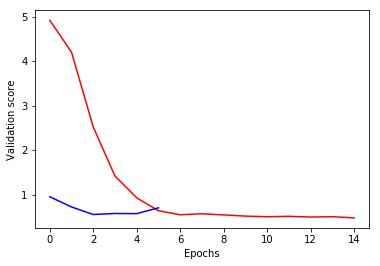

In [42]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create model 1
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape = input_shape))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Fit model_1
model_1_training = model_1.fit(
    predictors, target, 
    epochs=15, 
    validation_split=0.2, 
    callbacks=[early_stopping_monitor], 
    verbose=False)

# Fit model_2
model_2_training = model_2.fit(
    predictors, target, 
    epochs=15, 
    validation_split=0.2, 
    callbacks=[early_stopping_monitor], 
    verbose=False)

# Create the plot
plt.plot(
    model_1_training.history['val_loss'], 'r', 
    model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


- The blue model is very different each time I run this code chunk
  - It does not seem as stable. It has a tendency to jump up and down
- The red model usually looks fairly similar on each run.
 - Some times it actually does better than the blue model which is supposed to be better here. 

### Adding layers to a network
- Now we'll experiment with a deeper network

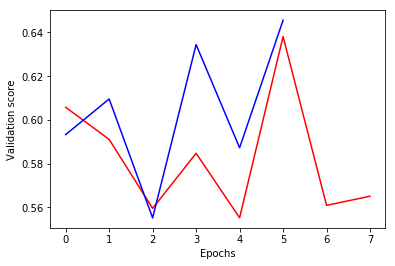

In [43]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create model 1
# Create the new model: model_2
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])


# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Fit model 1
model_1_training = model_1.fit(
    predictors, target, 
    epochs=20, 
    validation_split=0.4, 
    callbacks=[early_stopping_monitor], 
    verbose=False)

# Fit model 2
model_2_training = model_2.fit(
    predictors, target, 
    epochs=20, 
    validation_split=0.4, 
    callbacks=[early_stopping_monitor], 
    verbose=False)

# Create the plot
plt.plot(
    model_1_training.history['val_loss'], 'r',
    model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


- This is an interesting example.  But again it seems to be a coin flip as to which model is better. 
- Also they pth seem to jump up in the validation score sometimes at random. 
  - I would think the tuning would improve over time steadily

## Thinking about model capacity

- Its still a little more of an 'art' to tune good deep learning algorithms compared to other types of maching learning algorithms
- Model capacity should be one of the key considerations when considering what models to try 
- Model (or network) capacity is closely related to over and under fitting
- Model capicity is our models ability to capture predictive patterns in our data
- Adding more nodoes to a layer or more layers, increases the models capacity
![](images/model_capacity.png)

#### Workflow for optimizing model capacity
- Start with a small network
- Gradually increase capacity
- Keep increasing capacity until validation score is no longer improving
- You can back it up a little bit but the model is probably near the ideal
- Here is an example workflow
![](images/workflow.png)


- How should we add capaicty, nodes or layer?
  - There is no universal answer to this
  - Generally we just want to consider if we are increasing or decreasing capacity
 

## Stepping up to images

#### Recognizin handwritten digits
- MNIST dataset
  - This is a very popular dataset to get started working with images
  - I think we used this in Andrew Ng's machine learning class on coursera
- 28 x 28 grid flattened to 784 values for each image
- Value in each part of array denotes darkness of that pixel 0 - 255

### Building your own digit recognition model

- We've loaded only 2500 images, rather than 60000 which you will see in some published results. 
- Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

- If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. 
- If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. 
- Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

In [44]:
file = 'https://assets.datacamp.com/production/course_1975/datasets/mnist.csv'
digits = pd.read_csv(file)
print(digits.shape)
digits.head()

(2000, 785)


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X = digits.drop('5', axis = 1).values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
y = to_categorical(digits.iloc[:,0])
y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

- I'm actyally just getting around 53% accuracy so I'm going to tweek this a bit


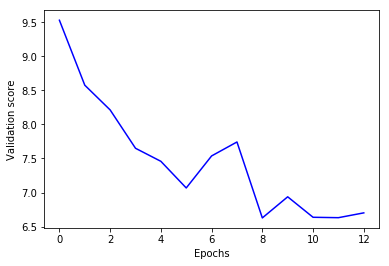

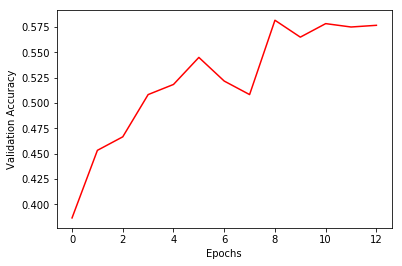

In [47]:
from keras.callbacks import EarlyStopping

n_cols = X.shape[1]

# Create the model: model
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Fit the model
model_training = model.fit(
    X, y, 
    epochs = 20,
    validation_split = 0.3,
    callbacks = [EarlyStopping(patience = 3)],
    verbose = False)

# Create the plot
plt.plot(model_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

plt.plot(model_training.history['val_acc'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()


- Well that a little dissappointing
- I was hoping for something in the high nineties
- In the class we get .8893 with what I think is the same data

## Final thoughts

- The instructor says its just like riding a bike. The hardest part is getting to the point where you can practice on your own. And now we are there
- Start with problems that involve standard prediction problems on tables of numbers
  - So like the ones we have seen in previous classes
  - I can also use kaggle or other tutorials to see how this will perform
- Then try images (with convolutional neural networks)
- Kaggle is a great place to find datasets to work with
 - And there forums are a good place to keep learning as well
- Check this [wiki page](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research) on data sets for machine learning research
- keras.io has excellent documention
 - it also has nice examples
- tensor flow also has some good examples
- We need to set up a computer with GPUs. Get some on amazon. 
